### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Loading Dataset

In [2]:
file_source = r'C:\Users\ACER\Downloads\project\project\drive-download-20240217T123102Z-001\financial_loan.csv'
df = pd.read_csv(file_source)

### Printing the top 5 rows after loading

In [3]:
df.head(5)

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,...,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,11-02-2021,13-09-2021,13-04-2021,...,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,01-01-2021,14-12-2021,15-01-2021,...,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,05-01-2021,12-12-2021,09-01-2021,...,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,25-02-2021,12-12-2021,12-03-2021,...,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,01-01-2021,14-12-2021,15-01-2021,...,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


### Checking no Rows and Columns

In [4]:
df.shape

(38576, 24)

### Checking valid entries in each column

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  object        
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  object        
 12  member_id              38576 non-null  int64         
 13  p

### Checking the data types of the columns

In [6]:
df.dtypes

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object

### Checking for duplicate values

In [7]:
duplicates= df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [id, address_state, application_type, emp_length, emp_title, grade, home_ownership, issue_date, last_credit_pull_date, last_payment_date, loan_status, next_payment_date, member_id, purpose, sub_grade, term, verification_status, annual_income, dti, installment, int_rate, loan_amount, total_acc, total_payment]
Index: []

[0 rows x 24 columns]


### Calculating the count of IDs 

In [8]:
idcount = df['id'].duplicated(keep='first').count()
print(idcount)

38576


### Performing Math operations

In [9]:
df.describe(include=[np.number])

,id,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
std,2.113246e+05,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777
min,5.473400e+04,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000


### Calculating Total Loan Amount

In [10]:
TotalLoanAmount = df['loan_amount'].sum()

### Extracting month and year from issue date

In [11]:
df['issueMonth'] = df['issue_date'].str.slice(start=3, stop=5)
df['issueYear'] =df['issue_date'].str.slice(start=6 )
df['IssueDayNo'] = df['issue_date'].str.slice(start=0, stop=2 )
print(df['issueMonth'])
print(df['issueYear'])
print(df['IssueDayNo'])


0        02
1        01
2        01
3        02
4        01
         ..
38571    07
38572    10
38573    09
38574    10
38575    07
Name: issueMonth, Length: 38576, dtype: object
0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
38571    2021
38572    2021
38573    2021
38574    2021
38575    2021
Name: issueYear, Length: 38576, dtype: object
0        11
1        01
2        05
3        25
4        01
         ..
38571    11
38572    11
38573    11
38574    11
38575    11
Name: IssueDayNo, Length: 38576, dtype: object


In [12]:
df.loc[:,['issue_date','issueMonth','issueYear','loan_amount']]

,issue_date,issueMonth,issueYear,loan_amount
0,11-02-2021,02,2021,2500
1,01-01-2021,01,2021,3000
2,05-01-2021,01,2021,12000
3,25-02-2021,02,2021,4500
4,01-01-2021,01,2021,3500
...,...,...,...,...
38571,11-07-2021,07,2021,24250
38572,11-10-2021,10,2021,25200
38573,11-09-2021,09,2021,25000
38574,11-10-2021,10,2021,24000


In [13]:
df[['issue_date', 'last_credit_pull_date', 'last_payment_date', 'next_payment_date']]

,issue_date,last_credit_pull_date,last_payment_date,next_payment_date
0,11-02-2021,13-09-2021,13-04-2021,13-05-2021
1,01-01-2021,14-12-2021,15-01-2021,15-02-2021
2,05-01-2021,12-12-2021,09-01-2021,09-02-2021
3,25-02-2021,12-12-2021,12-03-2021,12-04-2021
4,01-01-2021,14-12-2021,15-01-2021,15-02-2021
...,...,...,...,...
38571,11-07-2021,16-05-2021,16-05-2021,16-06-2021
38572,11-10-2021,16-04-2021,16-05-2021,16-06-2021
38573,11-09-2021,16-05-2021,16-05-2021,16-06-2021
38574,11-10-2021,16-05-2021,16-05-2021,16-06-2021


### Alternate method

In [14]:
df['issue_date'] = pd.to_datetime(df['issue_date'], format='%d-%m-%Y')

# Extract the month and year into a new column 'month' and 'Year'
df['Imonth'] = df['issue_date'].dt.month
df['Iyear'] = df['issue_date'].dt.year
print(df['Imonth'])
print(df['Iyear'])

0         2
1         1
2         1
3         2
4         1
         ..
38571     7
38572    10
38573     9
38574    10
38575     7
Name: Imonth, Length: 38576, dtype: int32
0        2021
1        2021
2        2021
3        2021
4        2021
         ... 
38571    2021
38572    2021
38573    2021
38574    2021
38575    2021
Name: Iyear, Length: 38576, dtype: int32


### Calculating month wise count

In [15]:
Lcnt = df.groupby('issueMonth')['id'].count()
print(Lcnt)

issueMonth
01    2332
02    2279
03    2627
04    2755
05    2911
06    3184
07    3366
08    3441
09    3536
10    3796
11    4035
12    4314
Name: id, dtype: int64


### Sum of loan amount month wise

In [16]:
monthTotal = df.groupby('issueMonth')['loan_amount'].sum()
print(monthTotal)

issueMonth
01    25031650
02    24647825
03    28875700
04    29800800
05    31738350
06    34161475
07    35813900
08    38149600
09    40907725
10    44893800
11    47754825
12    53981425
Name: loan_amount, dtype: int64


In [17]:
#In case if day wise needed
DayTotal = df.groupby('IssueDayNo')['loan_amount'].sum()
print(DayTotal)

IssueDayNo
01         6500
02        32050
05        12000
07      2219275
08     14385275
09     46295750
10    119568600
11    253208725
12         5000
17         8000
19         6000
22         5400
25         4500
Name: loan_amount, dtype: int64


### Total Payment received by month

In [18]:
print(df['total_payment'].sum())

df['last_payment_date'] = pd.to_datetime(df['last_payment_date'], format='%d-%m-%Y')

# Extract the month and into a new column 'month'
df['Paymonth'] = df['last_payment_date'].dt.month
monthTotalPay = df.groupby('Paymonth')['total_payment'].sum()
print(monthTotalPay)


473070933
Paymonth
1     36069105
2     38455971
3     45333638
4     39408058
5     61099806
6     32150315
7     36016484
8     36858010
9     34523848
10    37526561
11    34654518
12    40974619
Name: total_payment, dtype: int64


### Avg Interest %

In [19]:
avg_intrate = (df['int_rate'].mean()) * 100
print(avg_intrate)
monthavg_intrate = (df.groupby('issueMonth')['int_rate'].mean())*100
print(monthavg_intrate)

12.048831397760265
issueMonth
01    11.461887
02    11.721632
03    11.858291
04    11.740907
05    12.257795
06    12.274243
07    12.237237
08    12.300235
09    12.003232
10    12.024123
11    11.941717
12    12.356041
Name: int_rate, dtype: float64


### Avg DTI %

In [20]:
avg_dti = (df['dti'].mean()) * 100
print(avg_intrate)
monthavg_dti = (df.groupby('issueMonth')['dti'].mean())*100
print(monthavg_dti)


12.048831397760265
issueMonth
01    12.936985
02    13.409329
03    13.215615
04    13.219361
05    13.333744
06    13.243781
07    13.294816
08    13.353232
09    13.297848
10    13.414381
11    13.302734
12    13.665538
Name: dti, dtype: float64


## Good Loan VS Bad Loan

### Types of Loan Status

In [21]:
df['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current'], dtype=object)

### Loan Status count and its %

In [22]:
loancount = df.groupby('loan_status')['id'].count()
print(loancount)
loanstatper = (df.groupby('loan_status')['id'].count()/df['id'].count()) * 100
print(loanstatper)

loan_status
Charged Off     5333
Current         1098
Fully Paid     32145
Name: id, dtype: int64
loan_status
Charged Off    13.824658
Current         2.846329
Fully Paid     83.329013
Name: id, dtype: float64


### Amount lended and received

In [23]:
loanamountdis = df.groupby('loan_status')['loan_amount'].sum()
print(loanamountdis)
amountrec = df.groupby('loan_status')['total_payment'].sum()
print(amountrec)

loan_status
Charged Off     65532225
Current         18866500
Fully Paid     351358350
Name: loan_amount, dtype: int64
loan_status
Charged Off     37284763
Current         24199914
Fully Paid     411586256
Name: total_payment, dtype: int64


### Detail information about loans

In [24]:
loan_State = df.groupby('loan_status').agg(
    loancount = ('id','count'),
    Total_Amount_Received=('total_payment', 'sum'),
    Total_Funded_Amount=('loan_amount', 'sum'),
    Interest_Rate=('int_rate', lambda x: x.mean() * 100),
    DTI=('dti', lambda x: x.mean() * 100)
)
print(loan_State)

             loancount  Total_Amount_Received  Total_Funded_Amount  \
loan_status                                                          
Charged Off       5333               37284763             65532225   
Current           1098               24199914             18866500   
Fully Paid       32145              411586256            351358350   

             Interest_Rate        DTI  
loan_status                            
Charged Off      13.878575  14.004733  
Current          15.099326  14.724344  
Fully Paid       11.641071  13.167351  


### MoM % for requests

In [25]:
MoMc = Lcnt.pct_change().mul(100)
print(MoMc)


issueMonth
01          NaN
02    -2.272727
03    15.269855
04     4.872478
05     5.662432
06     9.378221
07     5.716080
08     2.228164
09     2.760825
10     7.352941
11     6.296101
12     6.914498
Name: id, dtype: float64


### MoM % for loan amount

In [26]:
MoMMTot = monthTotal.pct_change().mul(100)
print(MoMMTot)


issueMonth
01          NaN
02    -1.533359
03    17.153136
04     3.203732
05     6.501671
06     7.634691
07     4.837101
08     6.521769
09     7.229761
10     9.744064
11     6.372873
12    13.038682
Name: loan_amount, dtype: float64


### MoM Avg Interest Rate

In [27]:
MoMAIR= monthavg_intrate.pct_change().mul(100)
print(MoMAIR)


issueMonth
01         NaN
02    2.266167
03    1.165866
04   -0.989885
05    4.402446
06    0.134188
07   -0.301493
08    0.514808
09   -2.414612
10    0.174039
11   -0.685333
12    3.469546
Name: int_rate, dtype: float64


### MoM Avg DTI

In [28]:
MoMDTI = monthavg_dti.pct_change().mul(100)
print(MoMDTI)


issueMonth
01         NaN
02    3.651107
03   -1.444620
04    0.028348
05    0.865271
06   -0.674702
07    0.385346
08    0.439388
09   -0.414759
10    0.876330
11   -0.832296
12    2.727291
Name: dti, dtype: float64


### State wise Loan count calculation

In [46]:
state = df.groupby('address_state')['id'].count()
print(state)

address_state
AK      78
AL     432
AR     236
AZ     833
CA    6894
CO     770
CT     730
DC     214
DE     110
FL    2773
GA    1355
HI     170
IA       5
ID       6
IL    1486
IN       9
KS     260
KY     320
LA     426
MA    1310
MD    1027
ME       3
MI     685
MN     592
MO     660
MS      19
MT      79
NC     759
NE       5
NH     161
NJ    1822
NM     183
NV     482
NY    3701
OH    1188
OK     293
OR     436
PA    1482
RI     196
SC     464
SD      63
TN      17
TX    2664
UT     252
VA    1375
VT      54
WA     805
WI     446
WV     167
WY      79
Name: id, dtype: int64


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     38576 non-null  int64         
 1   address_state          38576 non-null  object        
 2   application_type       38576 non-null  object        
 3   emp_length             38576 non-null  object        
 4   emp_title              37138 non-null  object        
 5   grade                  38576 non-null  object        
 6   home_ownership         38576 non-null  object        
 7   issue_date             38576 non-null  datetime64[ns]
 8   last_credit_pull_date  38576 non-null  object        
 9   last_payment_date      38576 non-null  datetime64[ns]
 10  loan_status            38576 non-null  object        
 11  next_payment_date      38576 non-null  object        
 12  member_id              38576 non-null  int64         
 13  p

## Graphical Representations

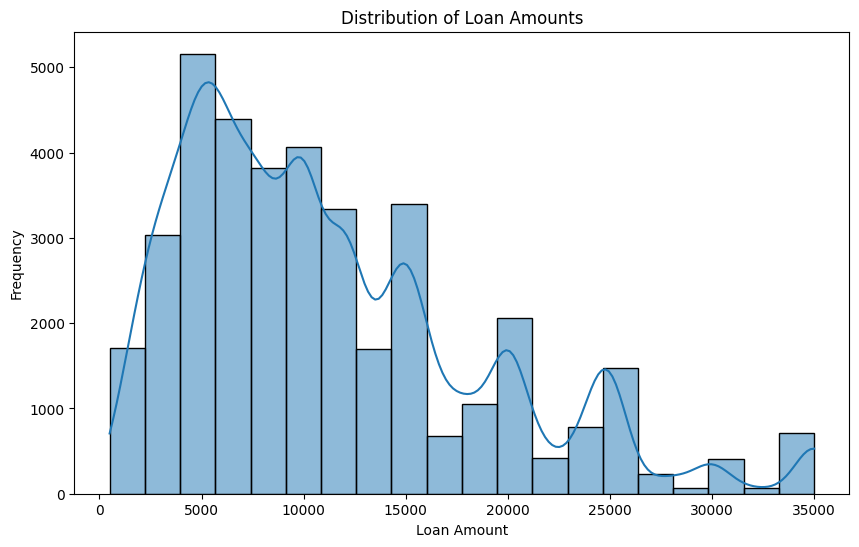

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['loan_amount'], bins=20, kde=True)
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


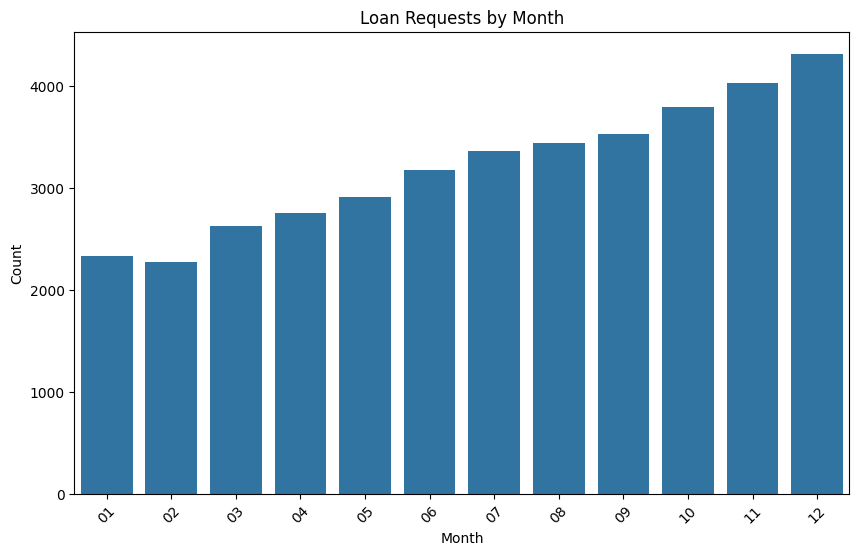

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(x=Lcnt.index, y=Lcnt.values)
plt.title('Loan Requests by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


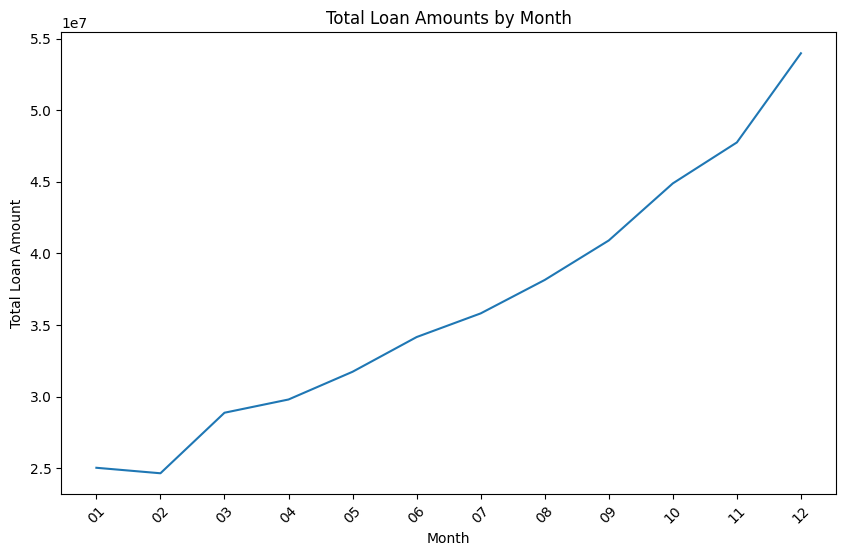

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(x=monthTotal.index, y=monthTotal.values)
plt.title('Total Loan Amounts by Month')
plt.xlabel('Month')
plt.ylabel('Total Loan Amount')
plt.xticks(rotation=45)
plt.show()


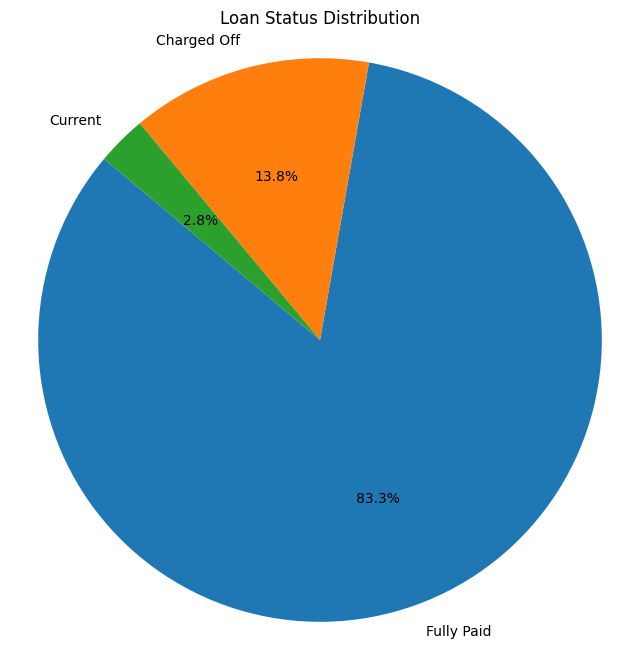

In [38]:

# Count the frequency of each loan status
loan_status_counts = df['loan_status'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_status_counts, labels=loan_status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Loan Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


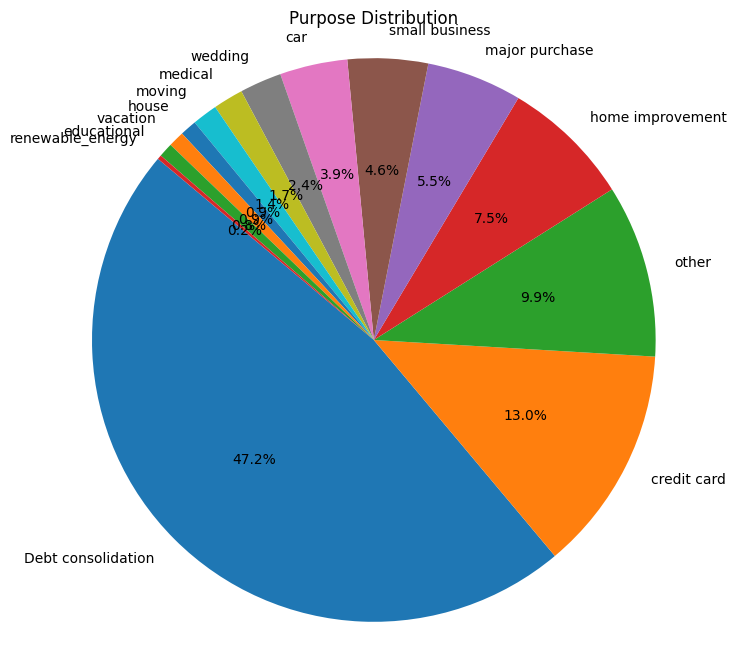

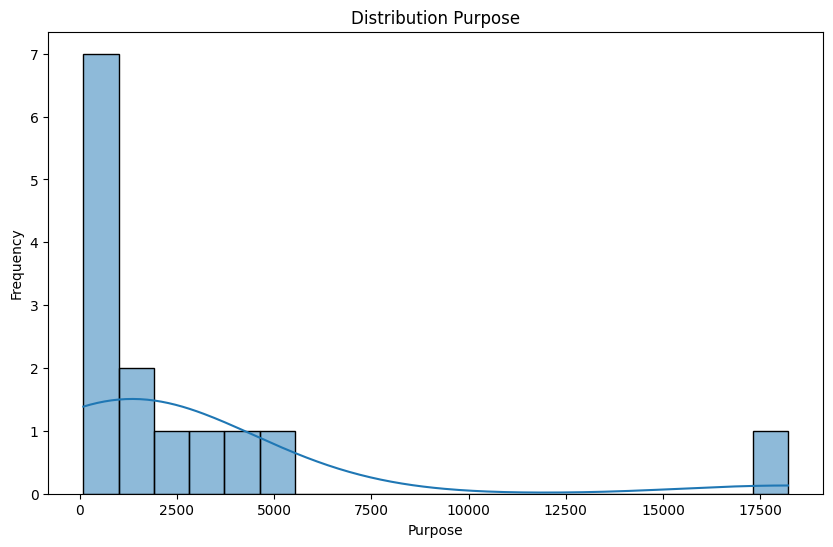

In [43]:

# Count the frequency of each Purpose 
Purpose_counts = df['purpose'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(Purpose_counts, labels=Purpose_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Purpose Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df['purpose'].value_counts(), bins=20, kde=True)
plt.title('Distribution Purpose')
plt.xlabel('Purpose')
plt.ylabel('Frequency')
plt.show()

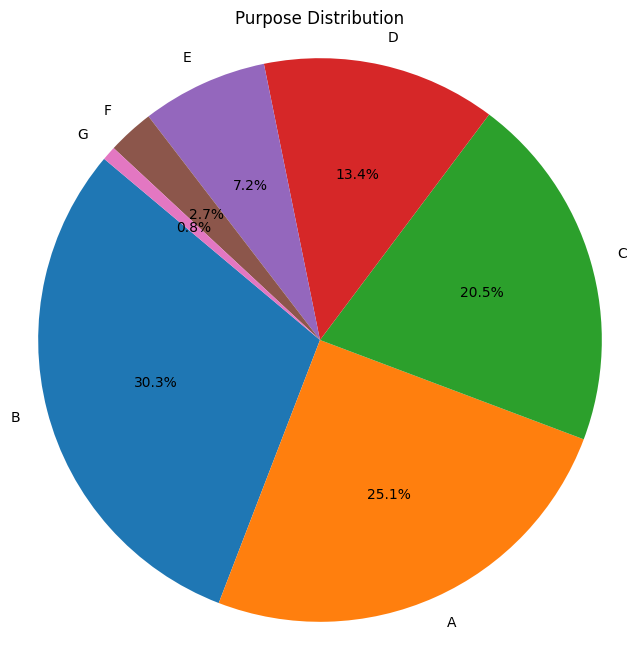

In [40]:
# Count the frequency of each grade 
grade_counts = df['grade'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Purpose Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


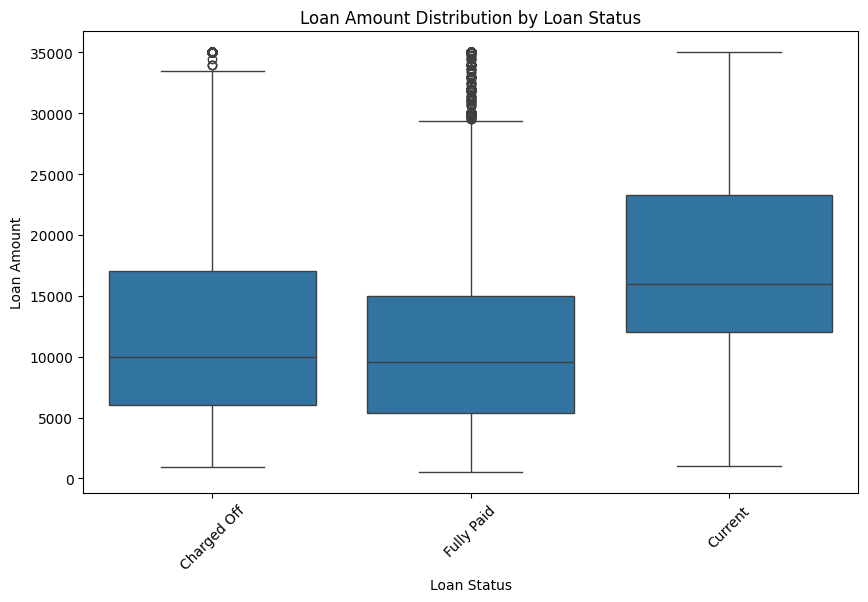

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_amount', data=df)
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.xticks(rotation=45)
plt.show()


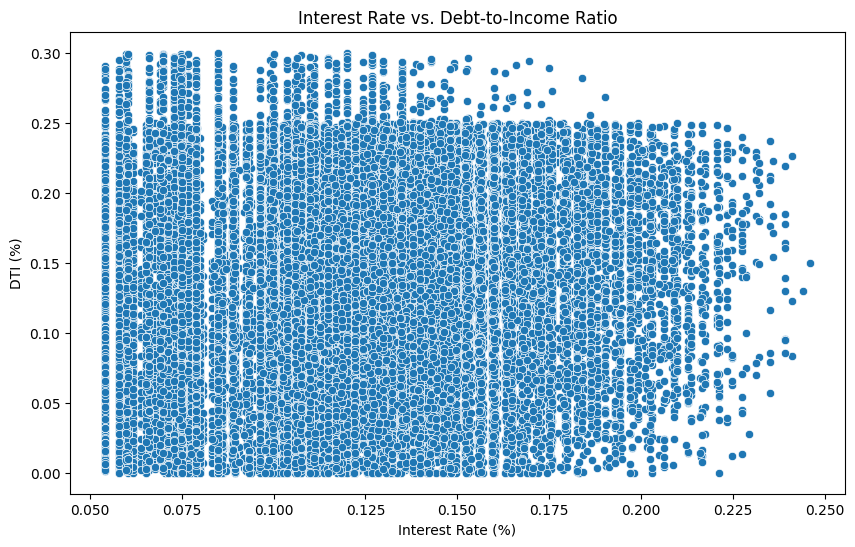

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='int_rate', y='dti', data=df)
plt.title('Interest Rate vs. Debt-to-Income Ratio')
plt.xlabel('Interest Rate (%)')
plt.ylabel('DTI (%)')
plt.show()


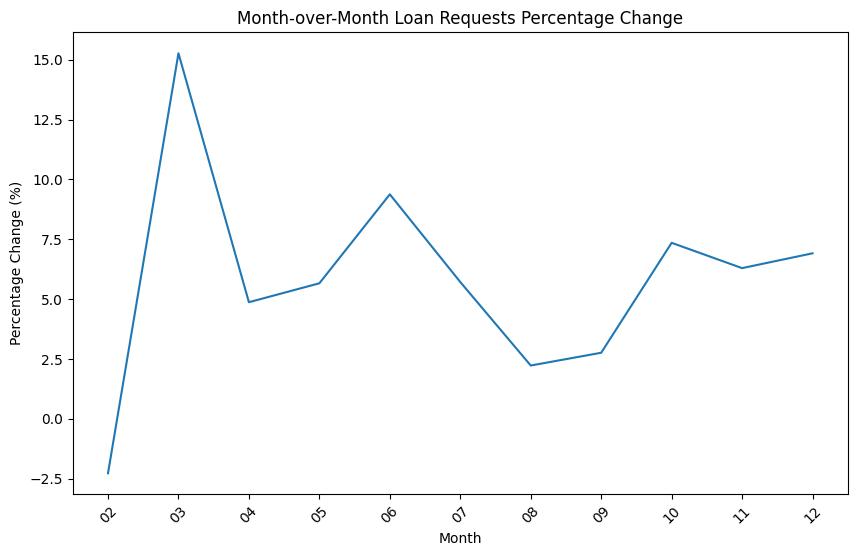

In [35]:
plt.figure(figsize=(10,6))
sns.lineplot(x=MoMc.index, y=MoMc.values)
plt.title('Month-over-Month Loan Requests Percentage Change')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.xticks(rotation=45)
plt.show()
